In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import PolynomialFeatures

In [6]:
cd Lab\ 1

/Users/apple/Desktop/zyl/SJSU/257/lab1/Lab 1


### Read the data and replace the missing value with np.nan

In [186]:
df = pd.read_csv('hcc-data.csv')
df.replace('?', np.nan, inplace = True)

In [187]:
data = df
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 50 columns):
Gender            165 non-null int64
Symptoms          147 non-null object
Alcohol           165 non-null int64
HBsAg             148 non-null object
HBeAg             126 non-null object
HBcAb             141 non-null object
HCVAb             156 non-null object
Cirrhosis         165 non-null int64
Endemic           126 non-null object
Smoking           124 non-null object
Diabetes          162 non-null object
Obesity           155 non-null object
Hemochro          142 non-null object
AHT               162 non-null object
CRI               163 non-null object
HIV               151 non-null object
NASH              143 non-null object
Varices           113 non-null object
Spleno            150 non-null object
PHT               154 non-null object
PVT               162 non-null object
Metastasis        161 non-null object
Hallmark          163 non-null object
Age               165 no

In [188]:
data.describe()

,Gender,Alcohol,Cirrhosis,Age,PS,Class
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000
mean,0.806061,0.739394,0.903030,64.690909,1.018182,0.618182
std,0.396586,0.440302,0.296817,13.319534,1.181528,0.487311
min,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,57.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,66.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,74.000000,2.000000,1.000000
max,1.000000,1.000000,1.000000,93.000000,4.000000,1.000000


In [189]:
data.head()

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALP,TP,Creatinine,Nodule,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,1,0,1,0,0,0,0,1,0,1,...,150,7.1,0.7,1,3.5,0.5,NaN,NaN,NaN,1
1,0,NaN,0,0,0,0,1,1,NaN,NaN,...,NaN,NaN,NaN,1,1.8,NaN,NaN,NaN,NaN,1
2,1,0,1,1,0,1,0,1,0,1,...,109,7,2.1,5,13,0.1,28,6,16,1
3,1,1,1,0,0,0,0,1,0,1,...,174,8.1,1.11,2,15.7,0.2,NaN,NaN,NaN,0
4,1,1,1,1,0,1,0,1,0,1,...,109,6.9,1.8,1,9,NaN,59,15,22,1


In [190]:
data.isnull().sum(axis = 0)

Gender             0
Symptoms          18
Alcohol            0
HBsAg             17
HBeAg             39
HBcAb             24
HCVAb              9
Cirrhosis          0
Endemic           39
Smoking           41
Diabetes           3
Obesity           10
Hemochro          23
AHT                3
CRI                2
HIV               14
NASH              22
Varices           52
Spleno            15
PHT               11
PVT                3
Metastasis         4
Hallmark           2
Age                0
Grams_day         48
Packs_year        53
PS                 0
Encephalopathy     1
Ascites            2
INR                4
AFP                8
Hemoglobin         3
MCV                3
Leucocytes         3
Platelets          3
Albumin            6
Total_Bil          5
ALT                4
AST                3
GGT                3
ALP                3
TP                11
Creatinine         7
Nodule             2
Major_Dim         20
Dir_Bil           44
Iron              79
Sat          

### Print the oldest, yongest, average and median age

In [191]:
print(data["Age"].max())
print(data["Age"].min())
print(data["Age"].mean())
print(data["Age"].quantile(0.5))

93
20
64.69090909090909
66.0


### Find the relationship between deaths and age

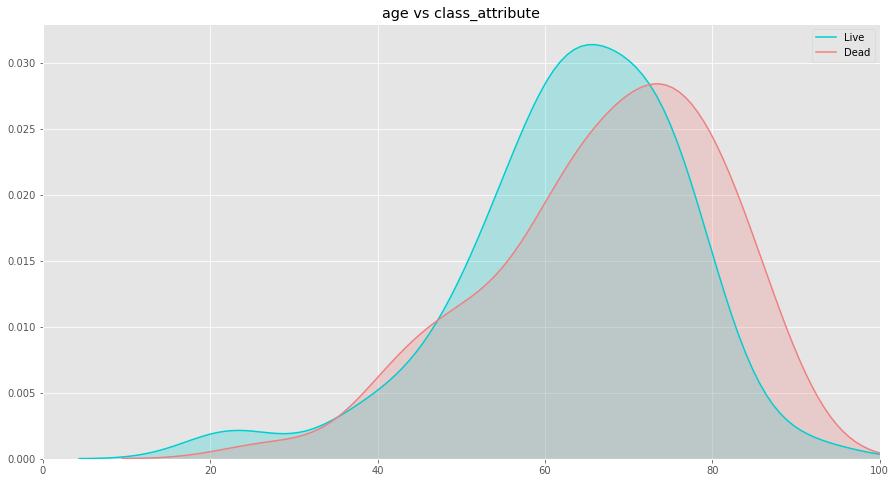

In [192]:
plt.figure(figsize = (15,8))

sns.kdeplot(
    data.Age[data.Class == 1],
    color = "darkturquoise",
    shade = True
)

sns.kdeplot(
    data.Age[data.Class == 0],
    color = "lightcoral",
    shade = True
)

plt.legend(['Live', 'Dead'])
plt.title('age vs class_attribute')
plt.xlim(0, 100)
plt.show()

### Find the age groups whose survival rate is the highest

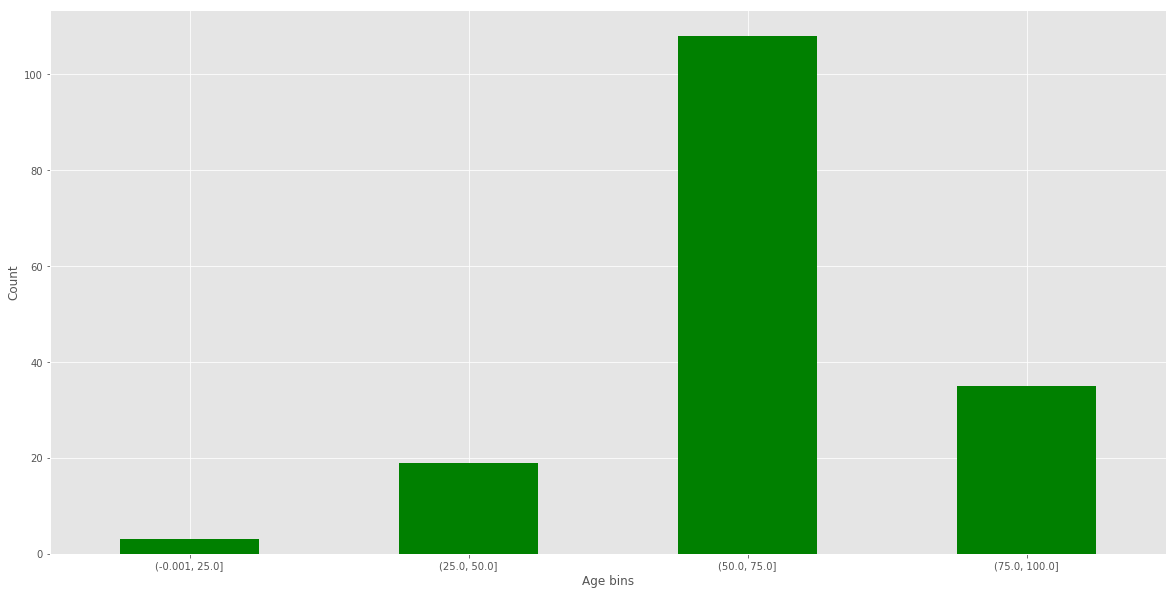

In [193]:
bins = [0, 25, 50, 75, 100]
out = pd.cut(
    data.Age,
    bins = bins,
    include_lowest = True
)

ax = out.value_counts(sort = False).plot.bar(
    rot = 0,
    color = 'g',
    figsize = (20, 10)
)

plt.xlabel('Age bins')
plt.ylabel('Count')
plt.show()

### Find the relationship between grams per day and age

/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


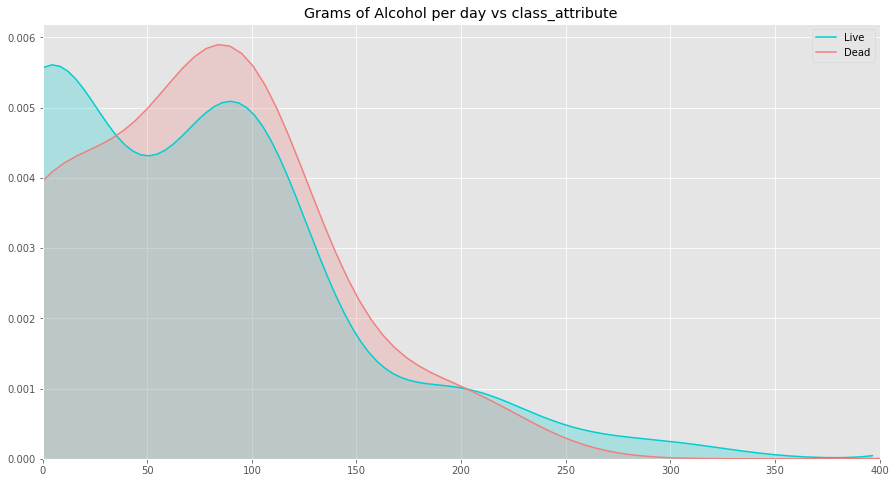

In [194]:
plt.figure(figsize = (15,8))

sns.kdeplot(
    data.Grams_day[data.Class == 1],
    color = "darkturquoise",
    shade = True
)

sns.kdeplot(
    data.Grams_day[data.Class == 0],
    color = "lightcoral",
    shade = True
)

plt.legend(['Live', 'Dead'])
plt.title('Grams of Alcohol per day vs class_attribute')
plt.xlim(0, 400)
plt.show()

### Find the relationship between packs of cigarettes per year and age

/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


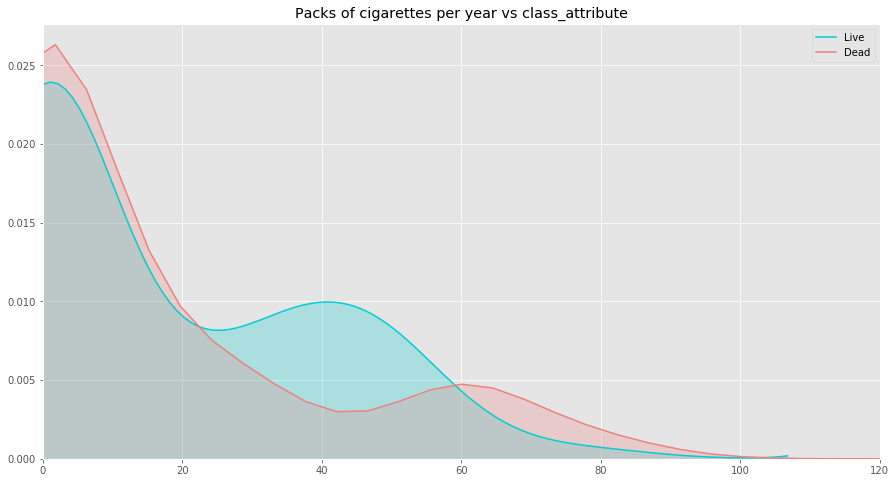

In [195]:
plt.figure(figsize = (15,8))

sns.kdeplot(
    data.Packs_year[data.Class == 1],
    color = "darkturquoise",
    shade = True
)

sns.kdeplot(
    data.Packs_year[data.Class == 0],
    color = "lightcoral",
    shade = True
)

plt.legend(['Live', 'Dead'])
plt.title('Packs of cigarettes per year vs class_attribute')
plt.xlim(0, 120)
plt.show()

### Find the relationship between AFP and age

/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


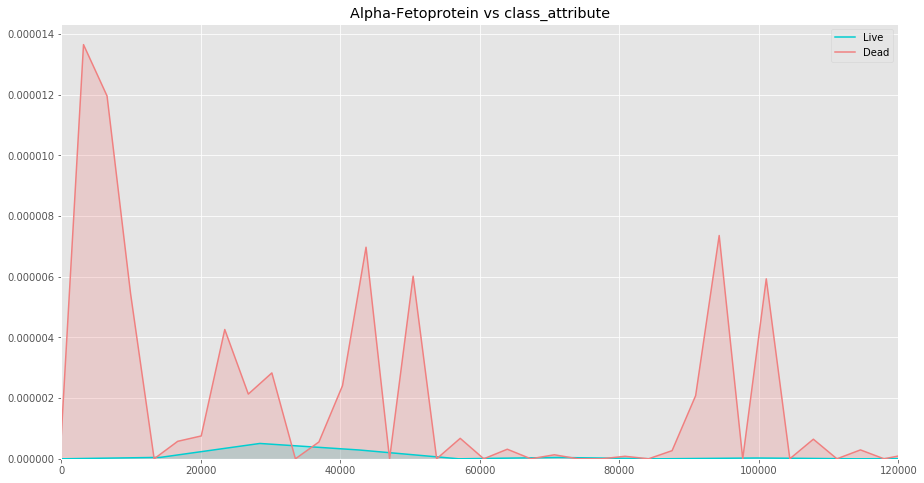

In [196]:
plt.figure(figsize = (15,8))

sns.kdeplot(
    data.AFP[data.Class == 1],
    color = "darkturquoise",
    shade = True
)

sns.kdeplot(
    data.AFP[data.Class == 0],
    color = "lightcoral",
    shade = True
)

plt.legend(['Live', 'Dead'])
plt.title('Alpha-Fetoprotein vs class_attribute')
plt.xlim(0, 120000)
plt.show()

### Corelation Matrix

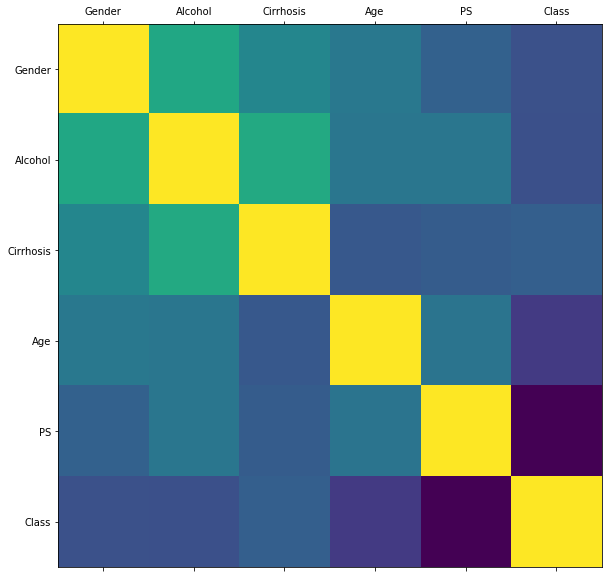

In [33]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
    
plot_corr(data)

### Scatter Matrix

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1153d4208>,
      dtype=object)

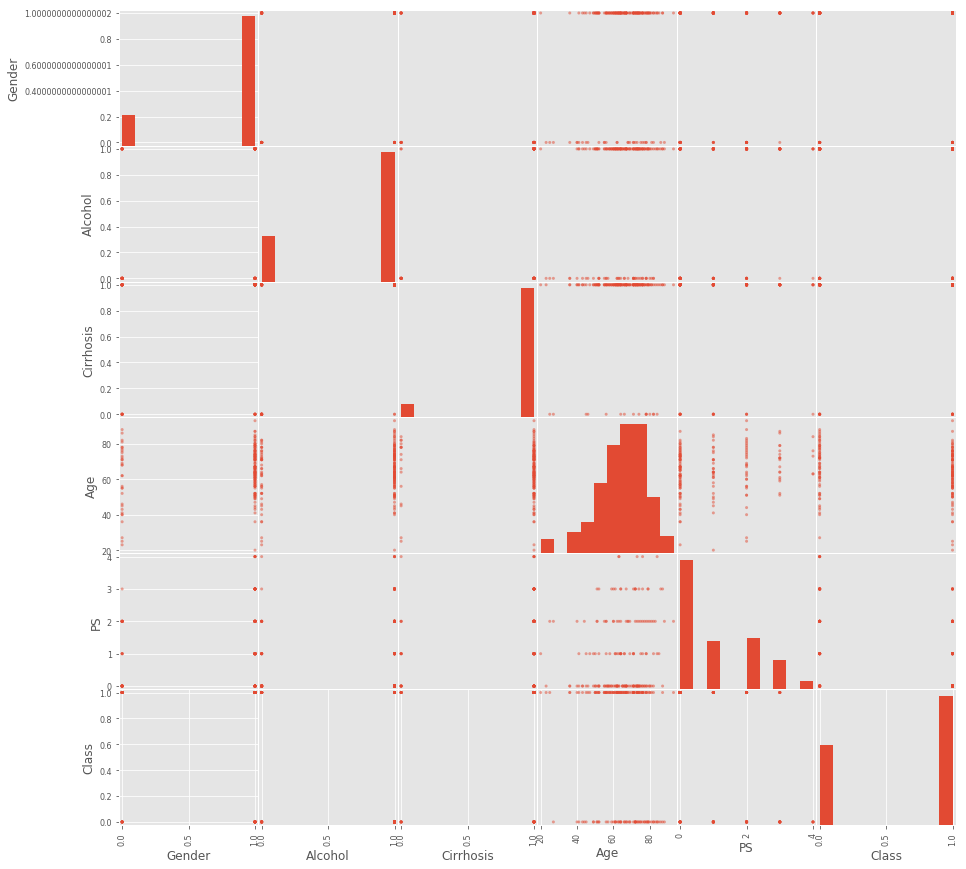

In [34]:
plt.style.use('ggplot')

pd.scatter_matrix(df, figsize = (15, 15))

### per column distribution

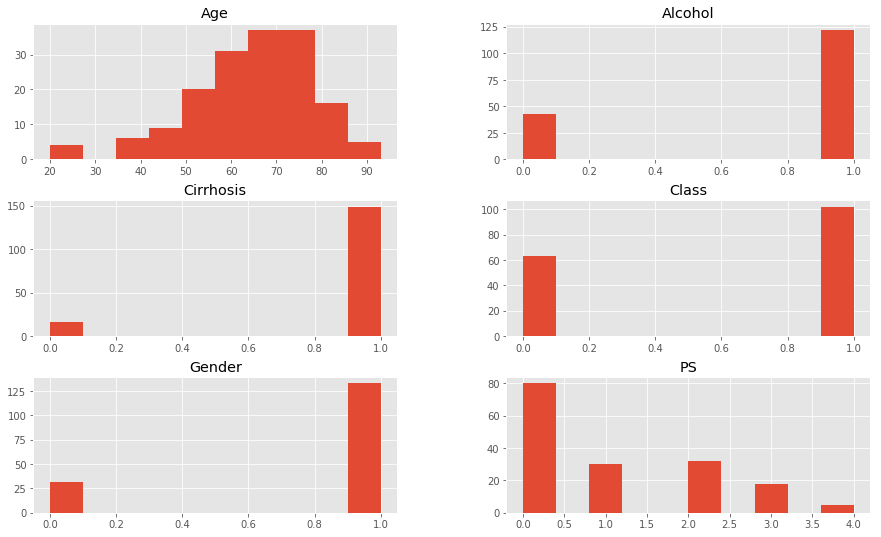

In [35]:
hist = df.hist(figsize = (15, 9))

### Get the count of missing values

In [36]:
df.isnull().sum()

Gender             0
Symptoms          18
Alcohol            0
HBsAg             17
HBeAg             39
HBcAb             24
HCVAb              9
Cirrhosis          0
Endemic           39
Smoking           41
Diabetes           3
Obesity           10
Hemochro          23
AHT                3
CRI                2
HIV               14
NASH              22
Varices           52
Spleno            15
PHT               11
PVT                3
Metastasis         4
Hallmark           2
Age                0
Grams_day         48
Packs_year        53
PS                 0
Encephalopathy     1
Ascites            2
INR                4
AFP                8
Hemoglobin         3
MCV                3
Leucocytes         3
Platelets          3
Albumin            6
Total_Bil          5
ALT                4
AST                3
GGT                3
ALP                3
TP                11
Creatinine         7
Nodule             2
Major_Dim         20
Dir_Bil           44
Iron              79
Sat          

### Heatmap

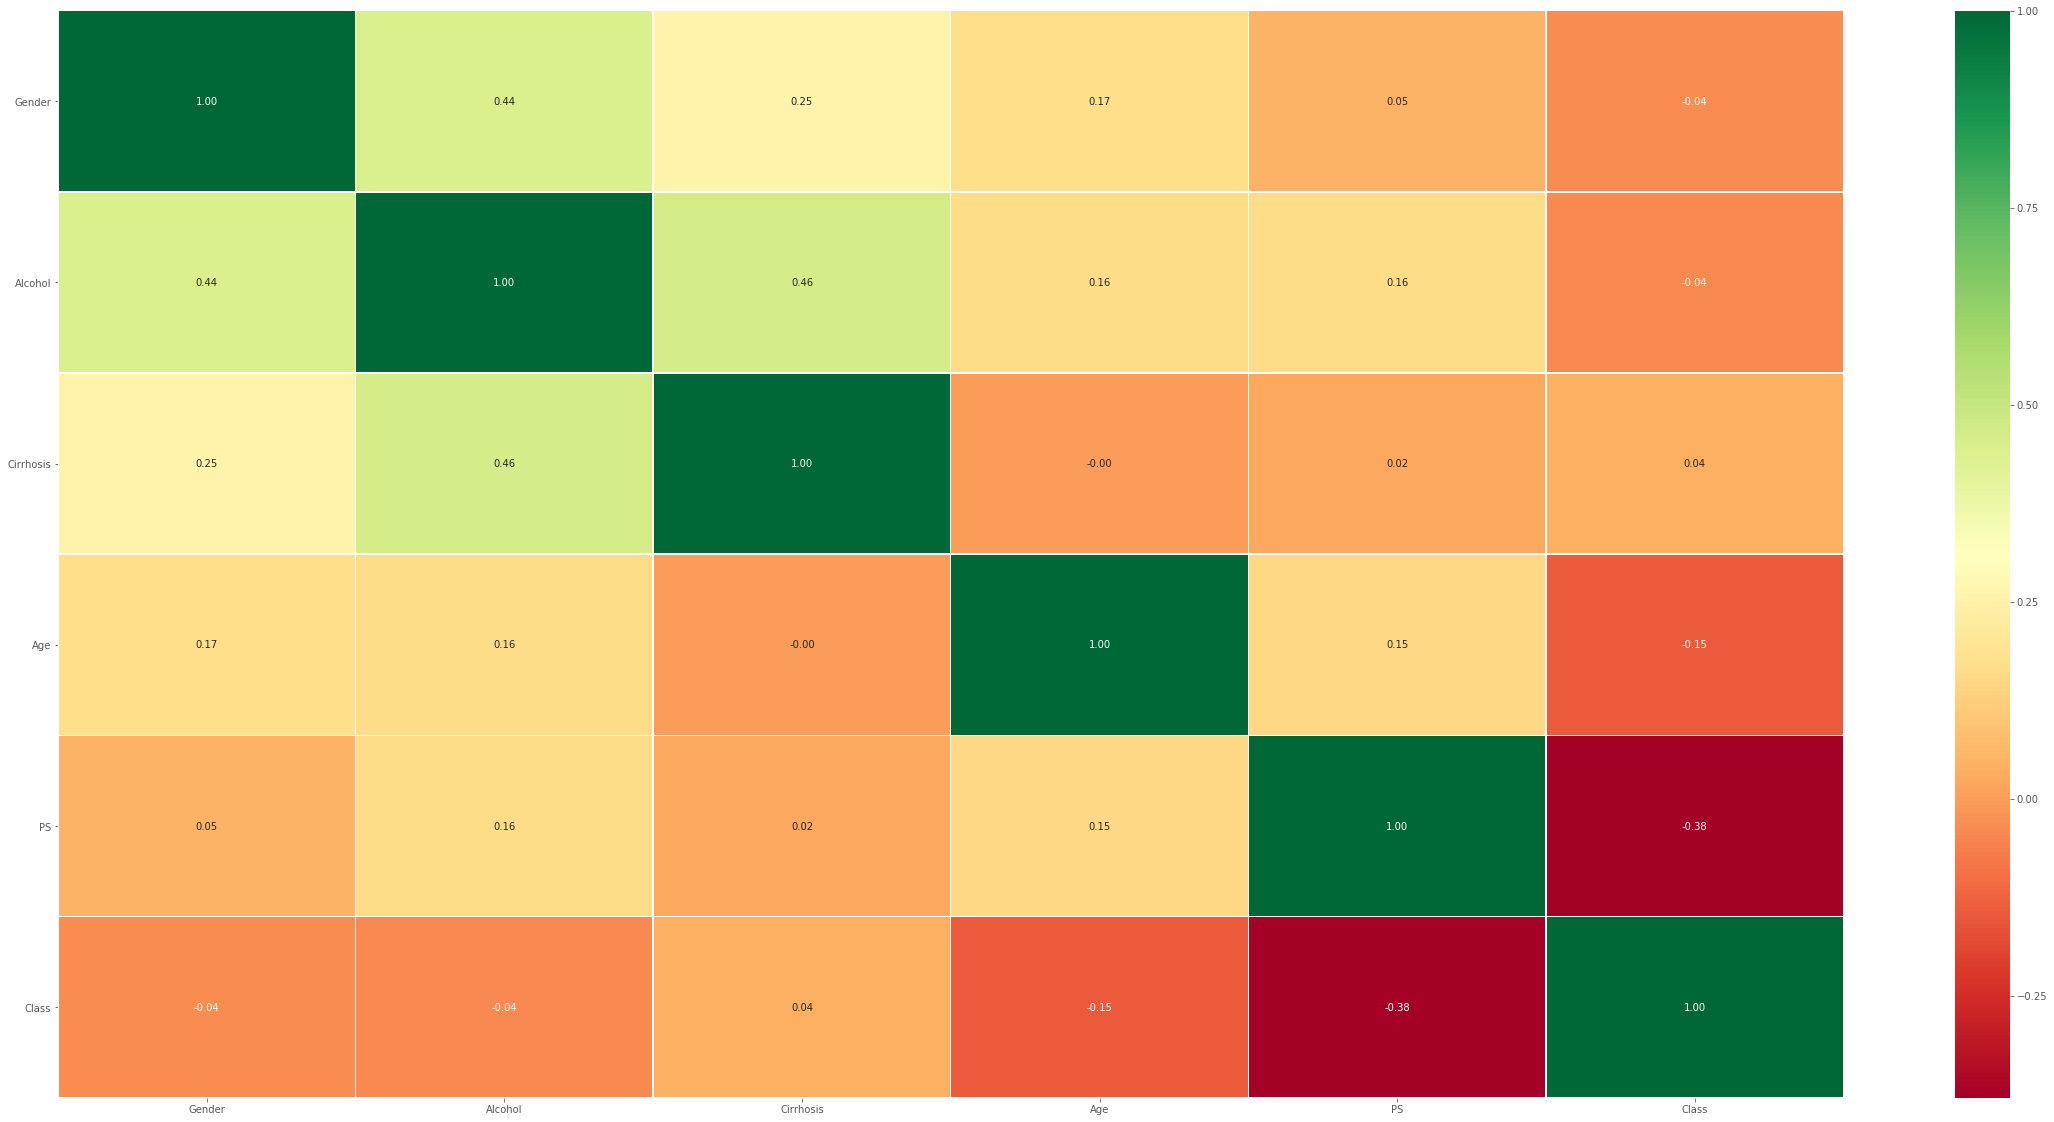

In [37]:
corr = data.corr()

sns.heatmap(
    data=corr,
    annot=True,
    fmt='.2f',
    linewidths=.5,
    cmap='RdYlGn',
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values
)

fig = plt.gcf()
fig.set_size_inches(40, 20)

plt.show()

### Apply different techniques to handle missing values

- data1: drop nan
- data2: pad with 0 
- data3: pad with column mean
- data4: pad with column mode

In [38]:
data1 = data.dropna()

Only 8 samples after dropping nan, no further consideration:

In [39]:
data1

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALP,TP,Creatinine,Nodule,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
2,1,0,1,1,0,1,0,1,0,1,...,109,7,2.1,5,13,0.1,28,6,16,1
15,0,0,1,0,0,0,0,1,0,0,...,176,5,0.8,2,2.6,1.3,25,13,60,1
28,1,0,1,0,0,0,0,1,0,1,...,293,7.7,0.67,2,6.5,0.4,94,27,70,0
61,1,1,1,0,0,1,1,1,0,1,...,207,6.3,0.69,1,3,1.9,224,95,363,1
67,1,1,1,0,0,1,0,1,0,0,...,113,37,0.4,1,2.7,0.2,94,37,48,1
90,1,1,1,0,0,0,0,1,0,0,...,177,6.8,0.7,3,3.5,1,37,11,173,0
108,1,1,1,0,0,0,0,1,0,0,...,163,6.1,0.67,5,20,0.5,131,78,1316,0
122,1,1,1,0,0,1,1,1,0,1,...,363,7.3,0.55,1,4,1.5,40,12,57,0


In [41]:
data2 = data.replace(np.nan, 0)
data2.head()

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALP,TP,Creatinine,Nodule,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,1,0,1,0,0,0,0,1,0,1,...,150,7.1,0.7,1,3.5,0.5,0,0,0,1
1,0,0,0,0,0,0,1,1,0,0,...,0,0,0,1,1.8,0,0,0,0,1
2,1,0,1,1,0,1,0,1,0,1,...,109,7,2.1,5,13,0.1,28,6,16,1
3,1,1,1,0,0,0,0,1,0,1,...,174,8.1,1.11,2,15.7,0.2,0,0,0,0
4,1,1,1,1,0,1,0,1,0,1,...,109,6.9,1.8,1,9,0,59,15,22,1


In [42]:
imp1 = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
data3 = data
imp1.fit(data3)
data3 = imp1.transform(data3)

In [78]:
imp2 = Imputer(missing_values = 'NaN', strategy = 'most_frequent', axis = 0)
data4 = data
imp2.fit(data4)
data4 = imp1.transform(data4)

## Evaluate "padding 0"

### Split dataset

In [384]:
data2.astype(float)
X2 = data2.loc[:, 'Gender' : 'Ferritin']
y2 = data2.loc[:,'Class']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.9)

In [385]:
X2_train = X2_train.values
X2_test = X2_test.values
y2_train = y2_train.values
y2_test = y2_test.values

### Train and predict. Output:
- precision
- recall
- F1 score

In [386]:
clf = LogisticRegression(random_state=1, solver='lbfgs', multi_class='multinomial').fit(X2_train, y2_train)
y2_pred = clf.predict(X2_test)
print(precision_recall_fscore_support(y2_test, y2_pred, average='micro'))

from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X2, y2, cv=5)
print(scores)

(0.6510067114093959, 0.6510067114093959, 0.6510067114093959, None)
[0.76470588 0.73529412 0.60606061 0.65625    0.75      ]


## Evaluate "padding mean"
### Split dataset

In [387]:
X3 = data3[:, :-1]
y3 = data3[:, -1]
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2)

### Train and predict. Output:
- precision
- recall
- F1 score

In [388]:
clf = LogisticRegression(random_state=2, solver='lbfgs', multi_class='multinomial').fit(X3_train, y3_train)
y3_pred = clf.predict(X3_test)
print(precision_recall_fscore_support(y3_test, y3_pred, average='micro'))

scores = cross_val_score(clf, X3, y3, cv=5)
print(scores)

(0.7575757575757576, 0.7575757575757576, 0.7575757575757576, None)
[0.70588235 0.79411765 0.60606061 0.71875    0.71875   ]


## Evaluate "padding mode"
### Split dataset

In [313]:
X4 = data4[:, :-1]
y4 = data4[:, -1]
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2)

### Train and predict. Output:
- precision
- recall
- F1 score

In [389]:
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X4_train, y4_train)
y4_pred = clf.predict(X4_test)
print(precision_recall_fscore_support(y4_test, y4_pred, average='micro'))

scores = cross_val_score(clf, X4, y4, cv=5)
print(scores)

(0.8484848484848485, 0.8484848484848485, 0.8484848484848486, None)
[0.70588235 0.79411765 0.60606061 0.71875    0.71875   ]


## Load the completed data(no missing value)

In [390]:
data_cb = pd.read_csv('hcc-data-complete-balanced.csv')

In [355]:
data_cb.astype(float)
X_cb = data_cb.loc[:, 'Gender' : 'Ferritin']
y_cb = data_cb.loc[:,'Class']

### Split dataset

In [366]:
X_cb_train, X_cb_test, y_cb_train, y_cb_test = train_test_split(X_cb, y_cb, test_size=0.2)

In [367]:
X_cb_train = X_cb_train.values
X_cb_test = X_cb_test.values
y_cb_train = y_cb_train.values
y_cb_test = y_cb_test.values

### Train and predict. Output:
- precision
- recall
- F1 score

In [392]:
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X_cb_train, y_cb_train)
y_cb_pred = clf.predict(X_cb_test)
print(precision_recall_fscore_support(y_cb_test, y_cb_pred, average='micro'))


scores = cross_val_score(clf, X_cb, y_cb, cv=5)
print(scores)

(0.8048780487804879, 0.8048780487804879, 0.8048780487804877, None)
[0.76190476 0.5952381  0.7        0.675      0.725     ]


In [398]:
poly = PolynomialFeatures(2)

X2_train_transform = poly.fit_transform(X2_train)
X2_test_transform = poly.fit_transform(X2_test)

In [399]:
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X2_train_transform, y2_train)
y2_pred = clf.predict(X2_test_transform)
print(precision_recall_fscore_support(y2_test, y2_pred, average='micro'))

scores = cross_val_score(clf, X_cb, y_cb, cv=5)
print(scores)

(0.40939597315436244, 0.40939597315436244, 0.40939597315436244, None)
[0.76190476 0.5952381  0.7        0.675      0.725     ]


In [400]:
poly = PolynomialFeatures(3)

X2_train_transform = poly.fit_transform(X2_train)
X2_test_transform = poly.fit_transform(X2_test)

In [401]:
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X2_train_transform, y2_train)
y2_pred = clf.predict(X2_test_transform)
print(precision_recall_fscore_support(y2_test, y2_pred, average='micro'))

scores = cross_val_score(clf, X_cb, y_cb, cv=5)
print(scores)

(0.40939597315436244, 0.40939597315436244, 0.40939597315436244, None)
[0.76190476 0.5952381  0.7        0.675      0.725     ]
